In [73]:
# Imports necesarios.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [74]:
# Base de datos CSV
data = pd.read_csv("base_datos.csv", encoding='utf-8', sep=",", decimal=".")
data.head() # Cabecera de los datos.

,Profundidad_Perforacion,Tiempo_Perforacion,Costo_Operacion,Concentracion_Cobre,Num_Trabajadores,Tipo_Maquinaria,Grupo_Turno
0,97.72,63.44,5298.69,34.23,22.0,Maquinaria_A,Turno_Noche
1,117.64,64.76,5697.33,33.90,25.0,Maquinaria_B,Turno_Noche
2,97.86,56.05,5225.78,27.79,24.0,Maquinaria_A,Turno_Noche
3,119.94,56.35,5198.99,33.67,28.0,Maquinaria_B,Turno_Noche
4,119.49,63.92,5866.86,38.16,24.0,Maquinaria_B,Turno_Mañana


In [96]:
#media tiempo perforacion2 decimales.
media_tp = data["Tiempo_Perforacion"].mean().round(2)
media_tp

52.58

In [97]:
#Media numero trabajadores2 decimales.
media_nt = data["Num_Trabajadores"].mean().round(2)
media_nt

22.73

In [98]:
#desviación estandar
desviacion_tp = data["Tiempo_Perforacion"].std().round(2)
desviacion_tp

6.45

In [99]:
#desviación estandar numero trabajadores
desviacion_nt = data["Num_Trabajadores"].std().round(2)
desviacion_nt

3.93

In [100]:
#cuartil 1 tiempo perforacion
cuartil1_tp = data["Tiempo_Perforacion"].quantile(0.25).round(2)
cuartil1_tp

47.88

In [102]:
#cuartil 3 numero trabajadores
cuartil3_nt = data["Num_Trabajadores"].quantile(0.75)
cuartil3_nt

26.0

**Problema 1**

Filtra los datos para incluir solo los registros del **'Turno_Noche'** y describe las estadísticas de **'Tiempo_Perforacion'** y **'Num_Trabajadores'** para este turno.

In [81]:
# Datos filtrados solo turno noche.
lista_turno_noche = data[data["Grupo_Turno"] == "Turno_Noche"]
lista_turno_noche

,Profundidad_Perforacion,Tiempo_Perforacion,Costo_Operacion,Concentracion_Cobre,Num_Trabajadores,Tipo_Maquinaria,Grupo_Turno
0,97.72,63.44,5298.69,34.23,22.0,Maquinaria_A,Turno_Noche
1,117.64,64.76,5697.33,33.90,25.0,Maquinaria_B,Turno_Noche
2,97.86,56.05,5225.78,27.79,24.0,Maquinaria_A,Turno_Noche
3,119.94,56.35,5198.99,33.67,28.0,Maquinaria_B,Turno_Noche
5,110.20,52.04,4800.02,34.47,21.0,Maquinaria_C,Turno_Noche
...,...,...,...,...,...,...,...
993,110.07,49.99,5156.25,31.79,18.0,Maquinaria_C,Turno_Noche
994,101.74,46.81,4852.90,37.20,18.0,Maquinaria_C,Turno_Noche
997,85.71,59.66,4569.57,29.96,20.0,Maquinaria_A,Turno_Noche
998,91.63,42.16,5113.77,30.29,25.0,Maquinaria_C,Turno_Noche


In [82]:
#Descripción de estadisticas de Tiempo_Perforacion.
lista_turno_noche["Tiempo_Perforacion"].describe().round(1)

count    519.0
mean      52.7
std        6.6
min       35.6
25%       48.1
50%       53.3
75%       57.2
max       69.8
Name: Tiempo_Perforacion, dtype: float64

In [83]:
#Descrpcion de estadisticas de Num_Trabajadores.
lista_turno_noche["Num_Trabajadores"].describe().round(1)

count    519.0
mean      22.6
std        4.1
min       12.4
25%       20.0
50%       23.0
75%       25.0
max       32.4
Name: Num_Trabajadores, dtype: float64

**Problema 2**

Crea una variable categórica 'Profundidad_Categorizada' que clasifique la
**'Profundidad_Perforacion'** en **'Baja'**, **'Media'** y **'Alta'** considerando que la clasificación media
acumula el **40%** de los datos centrales. Después, describe la variable **'Tiempo_Perforacion'** para
cada una de estas nuevas categorías.

In [84]:
#Creación de la variable 'Profundidad_Perforacion'.
q30, q70 = data['Profundidad_Perforacion'].quantile([0.3, 0.7])

def categorizarProfundidad(valor):
    if valor < q30:
        return "Baja"
    elif valor > q70:
        return "Alta"
    else:
        return "Media"

data["Profundidad_Categorizada"] = data["Profundidad_Perforacion"].apply(categorizarProfundidad)
data.head()

,Profundidad_Perforacion,Tiempo_Perforacion,Costo_Operacion,Concentracion_Cobre,Num_Trabajadores,Tipo_Maquinaria,Grupo_Turno,Profundidad_Categorizada
0,97.72,63.44,5298.69,34.23,22.0,Maquinaria_A,Turno_Noche,Baja
1,117.64,64.76,5697.33,33.90,25.0,Maquinaria_B,Turno_Noche,Alta
2,97.86,56.05,5225.78,27.79,24.0,Maquinaria_A,Turno_Noche,Baja
3,119.94,56.35,5198.99,33.67,28.0,Maquinaria_B,Turno_Noche,Alta
4,119.49,63.92,5866.86,38.16,24.0,Maquinaria_B,Turno_Mañana,Alta


In [85]:
# Descripción de la variable Tiempo_Perforacion para cada una de las categorias de Profundidad_Categorizada.
data.groupby("Profundidad_Categorizada")["Tiempo_Perforacion"].describe().round(1)


,count,mean,std,min,25%,50%,75%,max
Profundidad_Categorizada,,,,,,,,
Alta,300.0,54.3,6.8,35.8,50.5,54.8,60.0,68.3
Baja,300.0,51.6,5.4,35.6,47.5,52.0,55.7,69.8
Media,400.0,52.0,6.7,35.0,47.0,52.4,56.3,71.0


In [103]:
# Tiempo de perforación medio para profundidades bajas.
data[data["Profundidad_Categorizada"] == "Baja"]["Tiempo_Perforacion"].mean().round(2)

51.56

In [104]:
# Mediana de tiempo de perforación para profundidades bajas.
data[data["Profundidad_Categorizada"] == "Baja"]["Tiempo_Perforacion"].median().round(2)

52.0

In [105]:
# Tiempo de perforación medio para profundidades medias.
data[data["Profundidad_Categorizada"] == "Media"]["Tiempo_Perforacion"].mean().round(2)


52.03

In [106]:
# Mediana de tiempo de perforación para profundidades medias.
data[data["Profundidad_Categorizada"] == "Media"]["Tiempo_Perforacion"].median().round(2)

52.4

In [107]:
# Desviación estandar de tiempo de perforación para profundidades media.
data[data["Profundidad_Categorizada"] == "Media"]["Tiempo_Perforacion"].std().round(2)

6.69

In [108]:
# Máximo de tiempo de perforación para profundidades alta.
data[data["Profundidad_Categorizada"] == "Alta"]["Tiempo_Perforacion"].max().round(2)

68.33

**Problema 3**

Genera un diagrama de cajas para comparar la **'Profundidad_Perforacion'** en cada
tipo de **'Tipo_Maquinaria'** (Maquinaria_A, Maquinaria_B, Maquinaria_C).

<ul>
  <li>¿Qué tipo de maquinaria tiende a ser utilizada para perforaciones más profundas?.</li>
  <li>Identifique la máquina que cuenta con el mayor número de valores atípicos.</li>
  <li>Genere un archivo con la gráfica diagrama de cajas.</li>
</ul>

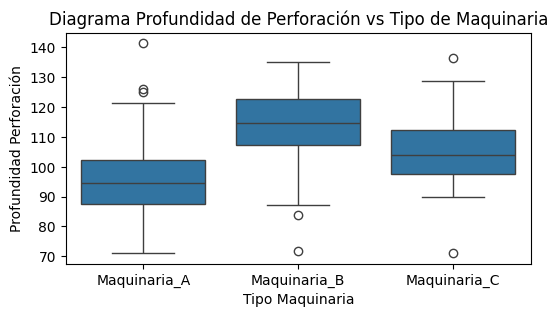

In [36]:
plt.figure(figsize=(6,3))
sns.boxplot(data=data, y="Profundidad_Perforacion", x="Tipo_Maquinaria")
plt.title("Diagrama Profundidad de Perforación vs Tipo de Maquinaria")
plt.ylabel("Profundidad Perforación")
plt.xlabel("Tipo Maquinaria")
plt.savefig("diagrama-profundidad-tipo-maquinaria.png")
plt.show()

¿Qué tipo de maquinaria tiende a ser utilizada para perforaciones más profundas?.

In [39]:
# Tipo de maquinaria para perforaciones más profundas.
media_tm = data.groupby('Tipo_Maquinaria')['Profundidad_Perforacion'].mean()
nameTipo = media_tm.idxmax()
print("El tipo de maquinaria que tiende a ser utilizada para perforaciones más profundas es :", nameTipo)

El tipo de maquinaria que tiende a ser utilizada para perforaciones más profundas es : Maquinaria_B


Identifique la máquina que cuenta con el mayor número de valores atípicos.

In [44]:
q1 = data["Profundidad_Perforacion"].quantile(0.25)
q3 = data["Profundidad_Perforacion"].quantile(0.75)

Lim_inf = q1-1.5*(q3-q1)
Lim_sup = q3+1.5*(q3-q1)

Lim_inf, Lim_sup


(68.68750000000003, 140.48749999999998)

In [53]:
atipicos = data[(data["Profundidad_Perforacion"] < Lim_inf) | (data["Profundidad_Perforacion"] > Lim_sup)]
atipicos

,Profundidad_Perforacion,Tiempo_Perforacion,Costo_Operacion,Concentracion_Cobre,Num_Trabajadores,Tipo_Maquinaria,Grupo_Turno,Profundidad_Categorizada
986,141.48,48.78,4829.53,31.99,22.0,Maquinaria_A,Turno_Mañana,Alta


In [59]:
def identificar_atipicos(data):
    nameProfundidad = "Profundidad_Perforacion"
    nameTipo = "Tipo_Maquinaria"
    atipicos = []
    for tipo in data[nameTipo].unique():
        data_filtrada = data[data[nameTipo] == tipo]
        q1 = data_filtrada[nameProfundidad].quantile(0.25)
        q3 = data_filtrada[nameProfundidad].quantile(0.75)
        iqr = 1.5 * (q3 - q1)
        lim_inf = q1 - iqr
        lim_sup = q3 + iqr

        atipicos_valores = data_filtrada[(data_filtrada[nameProfundidad] < lim_inf) | (data_filtrada[nameProfundidad] > lim_sup)]
        atipicos.append(atipicos_valores)
    return pd.concat(atipicos, ignore_index = True)

identificar_atipicos(data)

,Profundidad_Perforacion,Tiempo_Perforacion,Costo_Operacion,Concentracion_Cobre,Num_Trabajadores,Tipo_Maquinaria,Grupo_Turno,Profundidad_Categorizada
0,126.17,55.57,5422.91,43.12,18.0,Maquinaria_A,Turno_Noche,Alta
1,124.94,55.02,5008.77,30.19,19.5,Maquinaria_A,Turno_Noche,Alta
2,141.48,48.78,4829.53,31.99,22.0,Maquinaria_A,Turno_Mañana,Alta
3,83.94,50.03,5829.92,36.47,26.0,Maquinaria_B,Turno_Mañana,Baja
4,71.86,54.37,5639.40,33.68,21.0,Maquinaria_B,Turno_Noche,Baja
5,71.12,40.53,4955.27,33.56,24.0,Maquinaria_C,Turno_Mañana,Baja
6,136.63,45.90,4651.69,29.10,26.0,Maquinaria_C,Turno_Mañana,Alta
